<a href="https://colab.research.google.com/github/nghiaphan177/Truyvanttdpt/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

Loading the dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

Unnamed: 0                                            content    category
0           0  \nThuở hàn vi, các hãng mua máy bay chỉ bằng c...  kinh-doanh
1           1  \nGiá vàng trong nước sáng nay tiếp tục giảm t...  kinh-doanh
2           2  \nSo với lúc VN-Index tạo đáy cuối tháng 3, 29...  kinh-doanh
3           3  \nTrong bối cảnh Covid-19, nhiều người không p...  kinh-doanh
4           4  \nViệt Nam có thể là một trong những quốc gia ...  kinh-doanh

In [3]:
df.dtypes

Unnamed: 0     int64
content       object
category      object
dtype: object

**Number of each aritcles in each category**

In [4]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'category'],
    color='category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

**% of articles in each category**

In [5]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

**News length by category**

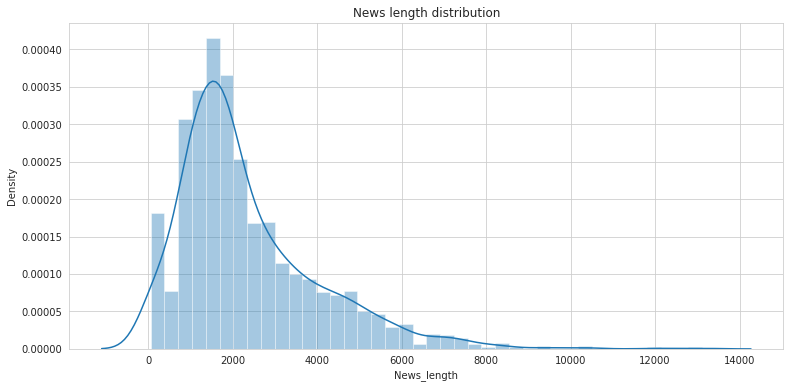

In [6]:
df['News_length'] = df['content'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [7]:
df['News_length'].describe()

count     1500.000000
mean      2334.303333
std       1670.868614
min         56.000000
25%       1200.750000
50%       1842.500000
75%       3076.750000
max      13110.000000
Name: News_length, dtype: float64

In [10]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

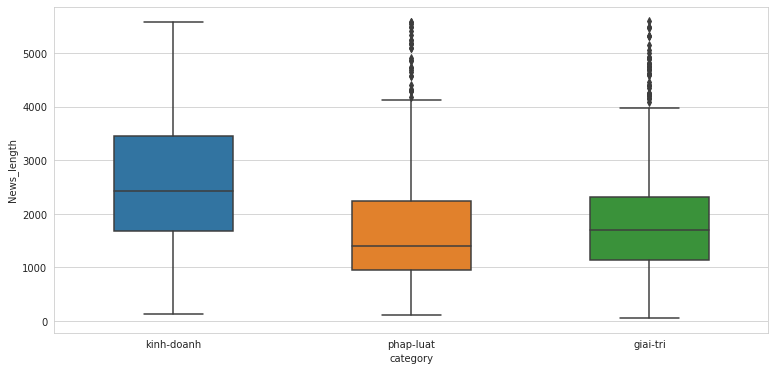

In [11]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='category', y='News_length', width=.5);

In [12]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)